In [1]:
import pandas as pd
import os
from sklearn.feature_extraction.text import TfidfVectorizer
from umap import UMAP
from sklearn.cluster import KMeans, DBSCAN, SpectralClustering
import numpy as np
import matplotlib.pyplot as plt

In [2]:
os.chdir('D:\JupyterLab\internship_1t')

In [3]:
df = pd.read_csv('datasets\caryerist_full.csv')

In [4]:
df

,name_vacancy,organization,price,city,date,url,vac_info
0,Ведущий full-stack разработчик .net,Транссеть,NaN,Нижний Новгород,28 Сентября 2023,https://nnov.careerist.ru/vakansii/vedushchiy-...,"Компания ""Транссеть"" АО «Транссеть» - российск..."
1,Full stack разработчик,Pay-market,от 60 000 руб.,Екатеринбург,28 Сентября 2023,https://ekaterinburg.careerist.ru/vakansii/ful...,"Компания ""Pay-market"" Pay – Market – это партн..."
2,FullStack разработчик( Промышленная Группа Соф...,Промышленная Группа София,от 100 000 руб.,Санкт-Петербург,28 Сентября 2023,https://spb.careerist.ru/vakansii/fullstack-ra...,"Компания ""Промышленная Группа София"" Мы, ИТ ко..."
3,Full Stack-разработчик,Rams Real Estate (Рамс Реал Эстэйт),NaN,Алматы,28 Сентября 2023,https://almaty.careerist.ru/vakansii/full-stac...,"Компания ""Rams Real Estate (Рамс Реал Эстэйт)""..."
4,Junior full-stack разработчик​,i-Media,NaN,Москва,28 Сентября 2023,https://careerist.ru/vakansii/junior-full-stac...,"Компания ""i-Media"" i-Mеdia - агентство интерне..."
...,...,...,...,...,...,...,...
8195,Менеджер проектов с опытом в ИТ (project manager),Айтембай,от 80 000 до 150 000 руб.,Смоленск,28 Сентября 2023,https://smolensk.careerist.ru/vakansii/menedzh...,"Компания ""Айтембай"" Вакансия: Менеджер проекто..."
8196,Middle / Middle+ Project Manager,Holyweb,от 150 000 руб.,Краснодар,28 Сентября 2023,https://krasnodar.careerist.ru/vakansii/middle...,"Компания ""Holyweb"" Holyweb – сервисная IT-комп..."
8197,Middle / Middle+ Project Manager,Holyweb,от 150 000 руб.,Санкт-Петербург,28 Сентября 2023,https://spb.careerist.ru/vakansii/middle-middl...,"Компания ""Holyweb"" Holyweb – сервисная IT-комп..."
8198,Project manager BTL,ICE,от 90 000 руб.,Москва,28 Сентября 2023,https://careerist.ru/vakansii/project-manager-...,"Компания ""ICE"" Вакансия Project manager с опыт..."


In [5]:
df.name_vacancy.duplicated().sum()

7967

In [6]:
df = df.loc[df.name_vacancy.drop_duplicates().index]

In [7]:
tfidf = TfidfVectorizer(binary=True, max_features=25)
text_embeddings = tfidf.fit_transform(df.name_vacancy).toarray()

In [8]:
text_embeddings

array([[0.        , 0.        , 0.        , ..., 0.        , 0.37502537,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.46703716,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 1.        ,
        0.        ],
       ...,
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ]])

In [9]:
# def cls_pooling(model_output):
#     return model_output.last_hidden_state[:, 0]

# def get_embeddings(text_list):
#     encoded_input = tokenizer(
#         text_list, padding=True, truncation=True, return_tensors="pt"
#     )
#     encoded_input = {k: v.to(device) for k, v in encoded_input.items()}
#     model_output = model(**encoded_input)
#     return cls_pooling(model_output)

In [10]:
# from transformers import AutoTokenizer, AutoModel
# import torch
# from datasets import Dataset


# model_ckpt = "DeepPavlov/rubert-base-cased"
# tokenizer = AutoTokenizer.from_pretrained(model_ckpt)
# model = AutoModel.from_pretrained(model_ckpt)

# device = torch.device("cuda")
# model.to(device)


# df = Dataset.from_pandas(df)

# embeddings_dataset = df.map(
#     lambda x: {"embeddings": np.array(get_embeddings(x["name_vacancy"])[0].detach().cpu().numpy())}
# )


In [11]:
# df = embeddings_dataset.to_pandas()

In [12]:
# text_embeddings = df.embeddings

In [13]:
# text_embeddings = text_embeddings.apply(lambda x: x.tolist())

In [14]:
# text_embeddings = np.array(list(text_embeddings.values))

In [15]:
# text_embeddings = text_embeddings
umap = UMAP(n_components=2)
embed_2d = umap.fit_transform(text_embeddings)
# embed_2d = cupy.asnumpy( embed_2d )

In [18]:
text_embeddings.shape

(233, 25)

In [ ]:
from sklearn.metrics import silhouette_score
km_silhouette = []

for i in range(2,30):
    km = KMeans(n_clusters=i, random_state=0,n_init='auto').fit(embed_2d)
    preds = km.predict(embed_2d)

    silhouette = silhouette_score(embed_2d,preds)
    km_silhouette.append(silhouette)
    print("Silhouette score for number of cluster(s) {}: {}".format(i,silhouette))

Silhouette score for number of cluster(s) 2: 0.414786159992218
Silhouette score for number of cluster(s) 3: 0.6166293025016785
Silhouette score for number of cluster(s) 4: 0.6255534887313843
Silhouette score for number of cluster(s) 5: 0.7118988633155823
Silhouette score for number of cluster(s) 6: 0.7900705337524414
Silhouette score for number of cluster(s) 7: 0.8426551222801208
Silhouette score for number of cluster(s) 8: 0.8581759333610535
Silhouette score for number of cluster(s) 9: 0.8673821687698364
Silhouette score for number of cluster(s) 10: 0.8746557831764221
Silhouette score for number of cluster(s) 11: 0.8944403529167175
Silhouette score for number of cluster(s) 12: 0.9304675459861755
Silhouette score for number of cluster(s) 13: 0.9558696150779724
Silhouette score for number of cluster(s) 14: 0.9303994178771973
Silhouette score for number of cluster(s) 15: 0.9159298539161682
Silhouette score for number of cluster(s) 16: 0.8599314093589783
Silhouette score for number of clu

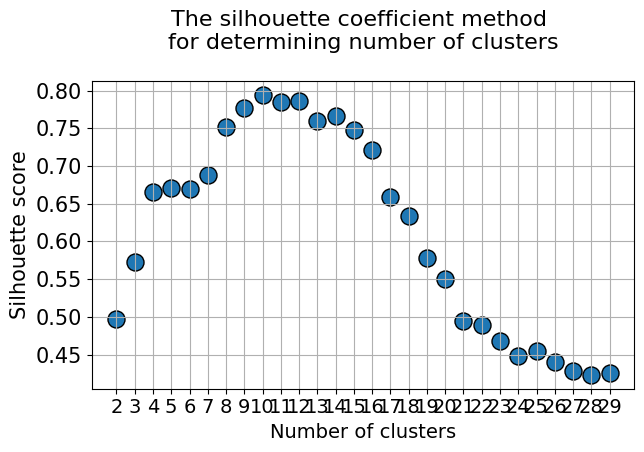

In [ ]:
plt.figure(figsize=(7,4))
plt.title("The silhouette coefficient method \nfor determining number of clusters\n",fontsize=16)
plt.scatter(x=[i for i in range(2,30)],y=km_silhouette,s=150,edgecolor='k')
plt.grid(True)
plt.xlabel("Number of clusters",fontsize=14)
plt.ylabel("Silhouette score",fontsize=15)
plt.xticks([i for i in range(2,30)],fontsize=14)
plt.yticks(fontsize=15)
plt.show()

In [ ]:
kmeans = KMeans(10,random_state=42)
kmeans.fit(embed_2d)
df['cluster'] = kmeans.labels_

c:\Users\pufis\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


In [ ]:
# df = df.merge(temp_df[['name_vacancy','cluster']],left_on='name_vacancy',right_on='name_vacancy')

In [ ]:
df.duplicated().sum()

7950

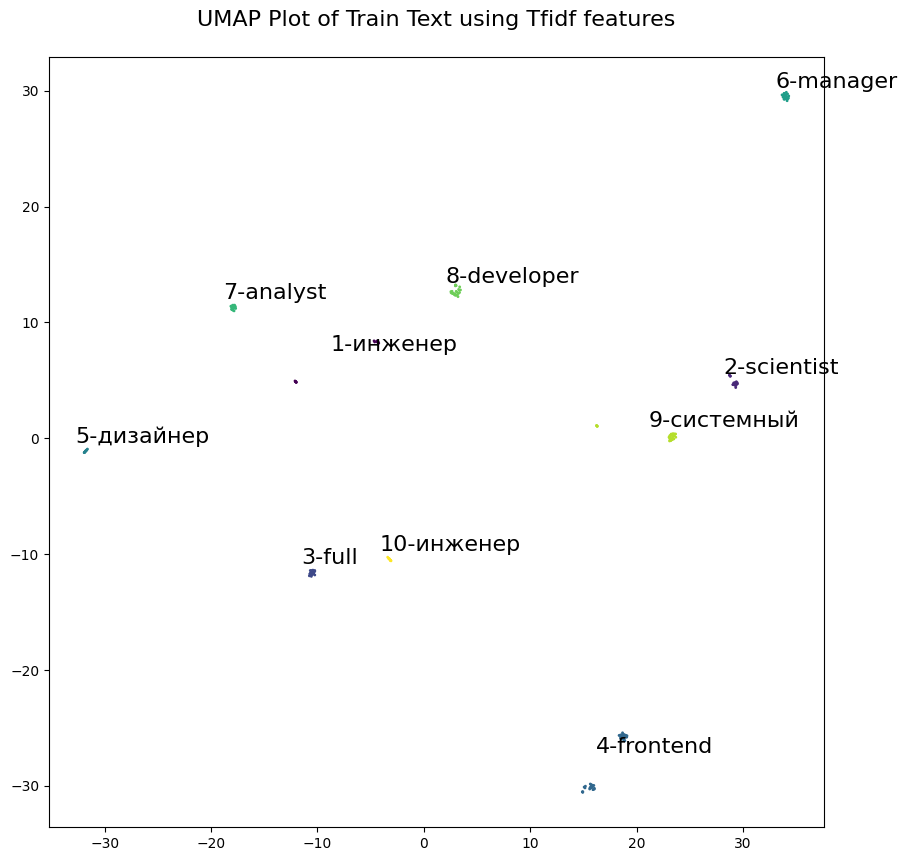

In [ ]:
import matplotlib.pyplot as plt

centers = kmeans.cluster_centers_

plt.figure(figsize=(10,10))
plt.scatter(embed_2d[:,0], embed_2d[:,1], s=1, c=kmeans.labels_)
plt.title('UMAP Plot of Train Text using Tfidf features\n',size=16)

for k in range(len(centers)):
    mm = np.mean(text_embeddings[df.cluster.values==k],axis=0)
    ii = np.argmax(mm)
    top_word = list(tfidf.vocabulary_.keys())[list(tfidf.vocabulary_.values()).index(ii)]
    plt.text(centers[k,0]-1,centers[k,1]+0.75,f'{k+1}-{top_word}',size=16)

plt.show()
# plt.savefig('clusters.png')

In [ ]:
df[df['cluster'] == 3]

,name_vacancy,organization,price,city,date,url,vac_info,cluster
7050,Аккаунт менеджер в digital-агентство (удалённо...,Алиев Руслан Чингизович \nsecurity\n\n\n ...,до 50 000 руб.,Москва,09 Октября 2023,https://careerist.ru/vakansii/akkaunt-menedzhe...,Обязанности:\n\r\nГлавная задача и цель - пост...,3
7051,Project Manager (Visual Design)( HuntIT ),HuntIT,NaN,Санкт-Петербург,29 Сентября 2023,https://spb.careerist.ru/vakansii/project-mana...,"Компания ""HuntIT"" Привет!)HuntIT - это передов...",3
7052,IT Project Manager / Менеджер проектов( GDC (I...,GDC (ICL Services),NaN,Казань,29 Сентября 2023,https://kazan.careerist.ru/vakansii/it-project...,"Компания ""GDC (ICL Services)"" Мы ICL Soft - ко...",3
7053,Project manager онлайн школ,Важная рыба,от 60 000 руб.,Санкт-Петербург,29 Сентября 2023,https://spb.careerist.ru/vakansii/project-mana...,"Компания ""Важная рыба"" Привет! Меня зовут Анге...",3
7054,Project manager( Парфюмерный супермаркет Золот...,Парфюмерный супермаркет Золотое Яблоко,NaN,Екатеринбург,29 Сентября 2023,https://ekaterinburg.careerist.ru/vakansii/pro...,"Компания ""Парфюмерный супермаркет Золотое Ябло...",3
7055,Marketing Project Manager,"DODO BRANDS (Dodo Pizza, Drinkit, Doner 42)",NaN,Москва,29 Сентября 2023,https://careerist.ru/vakansii/marketing-projec...,"Компания ""DODO BRANDS (Dodo Pizza, Drinkit, Do...",3
7056,Project Manager / Analyst,Bellerage,NaN,Москва,29 Сентября 2023,https://careerist.ru/vakansii/project-manager-...,"Компания ""Bellerage"" Компания Bellerage начала...",3
7057,Project manager (методология кредитования мало...,Альфа-Банк,NaN,Москва,29 Сентября 2023,https://careerist.ru/vakansii/project-manager-...,"Компания ""Альфа-Банк"" Обязанности: Организовы...",3
7058,Project manager( Медиа Бизнес Солюшенс ),Медиа Бизнес Солюшенс,NaN,Москва,29 Сентября 2023,https://careerist.ru/vakansii/project-manager-...,"Компания ""Медиа Бизнес Солюшенс"" Компания «Вит...",3
7059,IT Project Manager (Infrastructure),Публичная Компания «Freedom Finance Global PLC,NaN,Алматы,29 Сентября 2023,https://almaty.careerist.ru/vakansii/it-projec...,"Компания ""Публичная Компания «Freedom Finance ...",3


In [ ]:
# for k in range(5):
#     mm = np.mean( text_embeddings[df.cluster.values==k],axis=0 )
#     ii = ( np.argsort(mm)[-5:][::-1] )
#     top_words = [list(tfidf.vocabulary_.keys())[list(tfidf.vocabulary_.values()).index(i)] for i in ii]
#     print('#'*25)
#     print(f'### Topic {k+1}')
#     print('### Top 5 Words',top_words)
#     print('#'*25)
#     tmp = df.loc[df.cluster==k].sample(3, random_state=123)
#     for j in range(3):
#         txt = tmp.iloc[j,0]
#         print('-'*10,f'Example {j+1}','-'*10)
#         print(txt,'\n')

#########################
### Topic 1
### Top 5 Words ['full', 'stack', 'разработчик', 'java', 'web']
#########################
---------- Example 1 ----------
Ведущий full-stack разработчик .net 

---------- Example 2 ----------
Full-stack разработчик (Java+React)( Интелкон ) 

---------- Example 3 ----------
Full stack разработчик С# 

#########################
### Topic 2
### Top 5 Words ['fullstack', 'ведущий', 'системный', 'аналитик', 'разработчик']
#########################
---------- Example 1 ----------
Ведущий системный аналитик (fullstack) 

---------- Example 2 ----------
Ведущий системный аналитик (fullstack) 

---------- Example 3 ----------
Ведущий системный аналитик (fullstack) 

#########################
### Topic 3
### Top 5 Words ['full', 'stack', 'senior', 'разработчик', 'javascript']
#########################
---------- Example 1 ----------
Full stack developer / Разработчик полного стека на JavaScript + Python 

---------- Example 2 ----------
Senior Full stack раз